# I have coded some basic technical indicators from scratch here

In [2]:
#Fetching Data
import pandas_datareader.data as pdr
import datetime as dt
import pandas as pd
import numpy as np
tickers  = ['SBIN.NS'] # Enter all the tickers whose data you require
stock_cp = pd.DataFrame()
stock_low= pd.DataFrame()
stock_high= pd.DataFrame()
start_date = dt.date.today() - dt.timedelta(365)  # Enter the Startdate in the form of datetime.date()
end_date = dt.date.today() # Enter the End Date in the form of datetime.date()
attempt = 0
drop = []
while len(tickers) != 0 and attempt <=5:
    tickers = [j for j in tickers if j not in drop]
    for i in range(len(tickers)):
        try:
            temp = pdr.get_data_yahoo(tickers[i],start_date,end_date)
            temp.dropna(inplace = True)
            stock_cp[tickers[i]] = temp['Adj Close']
            stock_low[tickers[i]] = temp['Low']
            stock_high[tickers[i]] = temp['High']
            drop.append(tickers[i])
        except:
            print(tickers[i],"failed to fetch data.....retrying")
            continue
        attempt+=1

## RSI

In [3]:
def rsi():
    n=14
    differences  = np.diff(stock_cp['SBIN.NS'])
    init=differences[:n]
    upgain = init[init>=0].sum()/n
    downloss = -init[init<0].sum()/n
    rs=upgain/downloss
    rsi = np.zeros_like(stock_cp['SBIN.NS'])
    rsi[:n] = 100. - 100./(1.+rs)
    # rsi
    count=1
    for x in range(n,len(stock_cp['SBIN.NS'])):
        diff = differences[x-1]
    #     print(differences[15])
        period=differences[count:x]

        upgain = period[period>=0].sum()/n
        downloss = -period[period<0].sum()/n
        rs=upgain/downloss
        rsi[x] = 100. - 100./(1.+rs)
        count=count+1
      
    stock_cp['RSI']=rsi
    return rsi


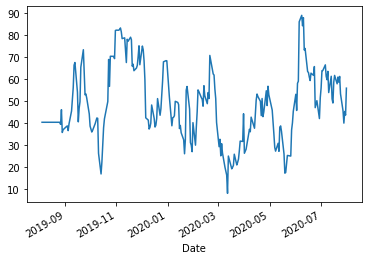

In [9]:
stock_cp['RSI'].plot()

## MACD

In [4]:
def macd():
    prices=stock_cp['SBIN.NS']
    avg12 = prices[:12].mean()
    avg26 = prices[:26].mean()
    mul12=2./(12.+1)
    mul26=2./(26.+1)

    ema12=np.zeros_like(prices)
    ema26=np.zeros_like(prices)
    macd=np.zeros_like(prices)
    ema12[:12]=avg12
    ema26[:26]=avg26

    for i in range(12,len(prices)):
        ema12[i] = prices[i]*mul12 +ema12[i-1]*(1-mul12)
        ema26[i] = prices[i]*mul26 +ema26[i-1]*(1-mul26)
    for x in range(len(prices)):
        macd[x]=ema12[x]-ema26[x]
    stock_cp['MACD']=macd
    return macd


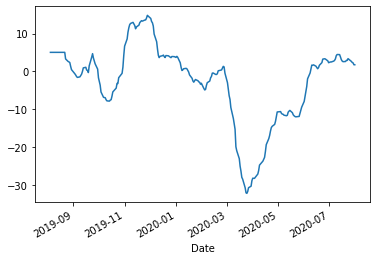

In [10]:
stock_cp['MACD'].plot()

## Bollinger Bands

In [5]:
def bollingerband():
    prices=stock_cp['SBIN.NS']
    
    avg20 = prices[:20].mean()
    sma=np.zeros_like(prices)
    sma[:20]=avg20
    stddev=np.zeros_like(prices)
    bolu=np.zeros_like(prices)
    bold=np.zeros_like(prices)
    stddev[:20]=prices[:20].std()
    bolu[:20]= avg20 + 2*stddev[0]
    bold[:20]= avg20 - 2*stddev[0]

    count=1
    for i in range(20,len(prices)):
        sma[i]=prices[count:i].mean()
        stddev[i]=prices[count:i].std()

        bolu[i]= sma[i]+ 2*stddev[i]
        bold[i]= sma[i]- 2*stddev[i]
        count=count+1
    stock_cp['BOLU']=bolu
    stock_cp['SMA']=sma
    stock_cp['BOLD']=bold
    
    
    return bolu,bold


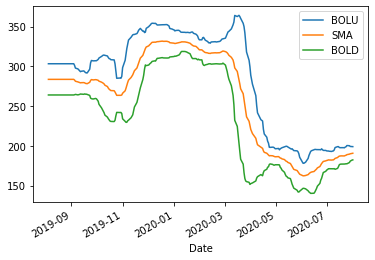

In [13]:
stock_cp[['BOLU','SMA','BOLD']].plot()

## ADX

In [6]:
def adx():
    prices=stock_cp['SBIN.NS']
    high=stock_high['SBIN.NS']
    low=stock_low['SBIN.NS']
    dmplus=np.diff(high)
    dmminus=np.diff(low)
    tr=np.zeros_like(prices)
    tr14=np.zeros_like(prices)
    for i in range(14):
        tr[i]=max(high[i]-low[i],abs(high[i]-prices[i]),abs(low[i]-prices[i]))

    sumtr14=tr[:14].sum()
    tr14[:14]=sumtr14
    dmp14=dmplus[:14].sum()
    # dmplus[:14]=dmp14
    dmm14=dmminus[:14].sum()
    # dmminus[:14]=dmm14

    dip=dmp14/sumtr14*100
    dim=dmm14/sumtr14*100

    dx14=abs(dip-dim)/abs(dim+dip)*100
    adx=np.zeros_like(prices)
    dx=np.zeros_like(prices)
    adx[:14]=dx14/14
    dx[:14]=dx14
    count=1
    for x in range(14,len(prices)):
        tr14[x]=tr14[x]-tr14[x-1]/14+tr[x]
        dmp14=dmplus[count:x].sum()
        # dmplus[:14]=dmp14
        dmm14=dmminus[count:x].sum()
        # dmminus[:14]=dmm14

        dip=dmp14/tr14[x]*100
        dim=dmm14/tr14[x]*100

        dx[x]=abs(dip-dim)/abs(dim+dip)*100
        adx[x]=((adx[x-1]*13)+dx[x])/14

    return adx


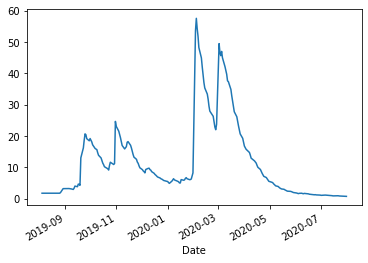

In [14]:
stock_cp['ADX'].plot()

## ATR

In [7]:
def atr():
    prices=stock_cp['SBIN.NS']
    high=stock_high['SBIN.NS']
    low=stock_low['SBIN.NS']
    tr=np.zeros_like(prices)
    atr=np.zeros_like(prices)
    for i in range(14):
        tr[i]=max(high[i]-low[i],abs(high[i]-prices[i]),abs(low[i]-prices[i]))
    # print(high[2]-low[2],abs(high[2]-prices[2]),abs(low[2]-prices[2]))
    # tr
    atr[:14]=tr[:14].sum()/14
    count=1
    for i in range(14,len(prices)):
        tr[i]=max(high[i]-low[i],abs(high[i]-prices[i]),abs(low[i]-prices[i]))
        atr[i]=tr[count:i].sum()/14
        count=count+1
       
    return atr


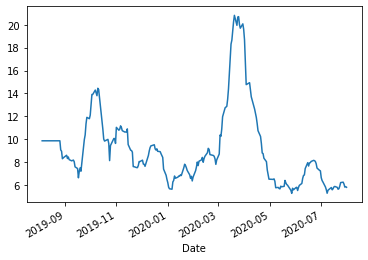

In [15]:
stock_cp['ATR'].plot()

In [8]:
stock_cp

,SBIN.NS,RSI,MACD,BOLU,SMA,BOLD,ADX,ATR
Date,,,,,,,,
2019-08-05,300.250000,40.319373,5.040063,303.209169,283.575002,263.940834,1.714881,9.853572
2019-08-06,301.399994,40.319373,5.040063,303.209169,283.575002,263.940834,1.714881,9.853572
2019-08-07,289.899994,40.319373,5.040063,303.209169,283.575002,263.940834,1.714881,9.853572
2019-08-08,294.350006,40.319373,5.040063,303.209169,283.575002,263.940834,1.714881,9.853572
2019-08-09,291.350006,40.319373,5.040063,303.209169,283.575002,263.940834,1.714881,9.853572
...,...,...,...,...,...,...,...,...
2020-07-27,187.149994,45.506150,2.648818,200.098154,189.526316,178.954478,0.760181,6.235715
2020-07-28,189.449997,39.937425,2.365811,199.196706,189.984210,180.771715,0.777232,6.067857
2020-07-29,191.199997,45.238085,2.256723,199.100708,190.228947,181.357185,0.762438,5.803571
